# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json 
import datetime as dt
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Set units to metric system
units = "metric"

In [4]:
# Define an empty list to fetch the weather data for each city
city_data = []
city_lat = []
city_lng = []
city_max_temp = []
city_humidity = []
city_clouds = []
city_wind = []
city_country = []
city_date = []
cities_removed = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat.append(city_weather['coord']['lat'])
        city_lng.append(city_weather['coord']['lon'])
        city_max_temp.append(city_weather['main']['temp_max'])
        city_humidity.append(city_weather['main']['humidity'])
        city_clouds.append(city_weather['clouds']['all'])
        city_wind.append(city_weather['wind']['speed'])
        city_country.append(city_weather['sys']['country'])
        city_date.append(city_weather['dt'])

        # Append the City information into city_data list
        city_data.append({"City": cities, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        cities_removed.append(city)
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tarinkot
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | namtsy
Processing Record 5 of Set 1 | argo
Processing Record 6 of Set 1 | karratha
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | margaret river
Processing Record 9 of Set 1 | college
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | hawaiian paradise park
Processing Record 12 of Set 1 | christchurch
Processing Record 13 of Set 1 | happy valley-goose bay
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | chu
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | udachny
Processing Record 18 of Set 1 | nova sintra
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | hiratacho
Processing R

In [25]:
try:
    for city in cities_removed:
        cities.remove(city)
except:
    print('Already removed cities')

# Convert the cities weather data into a Pandas DataFrame
city_data_df  =pd.DataFrame({"City": cities, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

city_data_df = city_data_df.dropna(how='any')

# Show Record Count
city_data_df.count()

Already removed cities


City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [26]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tarinkot,32.6268,65.8733,27.06,17,0,1.84,AF,1682584722
1,grytviken,-54.2811,-36.5092,1.02,82,58,4.75,GS,1682584723
2,port elizabeth,-33.9180,25.5701,23.94,82,20,12.35,ZA,1682584723
3,namtsy,62.7161,129.6658,1.88,91,100,2.79,RU,1682584724
4,argo,37.6333,22.7333,18.21,45,3,1.99,GR,1682584725


In [27]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [28]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tarinkot,32.6268,65.8733,27.06,17,0,1.84,AF,1682584722
1,grytviken,-54.2811,-36.5092,1.02,82,58,4.75,GS,1682584723
2,port elizabeth,-33.9180,25.5701,23.94,82,20,12.35,ZA,1682584723
3,namtsy,62.7161,129.6658,1.88,91,100,2.79,RU,1682584724
4,argo,37.6333,22.7333,18.21,45,3,1.99,GR,1682584725


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [29]:
#Get Today's date
today = dt.date.today()

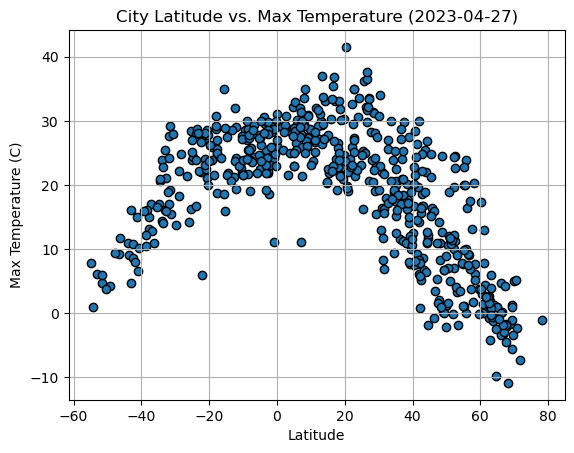

In [30]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', edgecolors = 'black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f"City Latitude vs. Max Temperature ({today.strftime('%Y-%m-%d')})")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

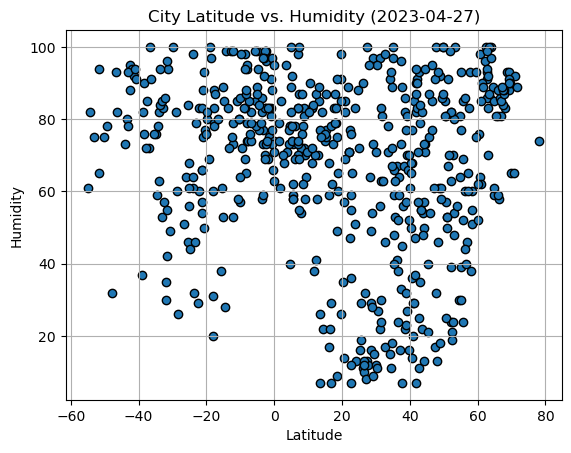

In [31]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', edgecolors = 'black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f"City Latitude vs. Humidity ({today.strftime('%Y-%m-%d')})")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

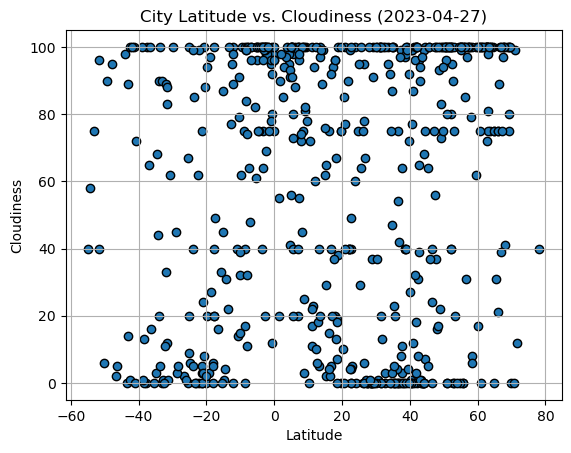

In [32]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', edgecolors = 'black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f"City Latitude vs. Cloudiness ({today.strftime('%Y-%m-%d')})")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

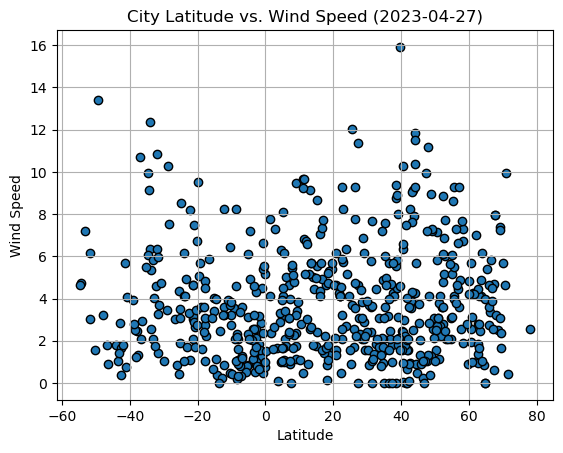

In [33]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', edgecolors = 'black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f"City Latitude vs. Wind Speed ({today.strftime('%Y-%m-%d')})")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [59]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_values, y_values, x_label, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    correlation = st.pearsonr(x_values,y_values)

    plt.scatter(x_values,y_values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Get current axis limits to calculate text position
    x_left, x_right = plt.xlim()
    y_bottom, y_top = plt.ylim()
 
    x_text = x_left + 0.05 * (x_right - x_left)
    y_text = y_bottom + 0.05 * (y_top - y_bottom)

    print(f"The r-squared is: {rvalue**2}")
    print(f"The correlation between both variables is {round(correlation[0],2)}.")
    
    return plt.plot(x_values,regress_values,"r-") and plt.annotate(line_eq,(x_text,y_text),fontsize=15,color="red")

In [46]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tarinkot,32.6268,65.8733,27.06,17,0,1.84,AF,1682584722
3,namtsy,62.7161,129.6658,1.88,91,100,2.79,RU,1682584724
4,argo,37.6333,22.7333,18.21,45,3,1.99,GR,1682584725
8,college,64.8569,-147.8028,0.99,59,75,0.00,US,1682584727
10,hawaiian paradise park,19.5933,-154.9731,22.80,91,75,1.54,US,1682584728


In [47]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,1.02,82,58,4.75,GS,1682584723
2,port elizabeth,-33.9180,25.5701,23.94,82,20,12.35,ZA,1682584723
5,karratha,-20.7377,116.8463,28.50,50,100,2.64,AU,1682584725
6,port-aux-francais,-49.3500,70.2167,4.24,78,90,13.40,TF,1682584726
7,margaret river,-33.9500,115.0667,14.38,63,90,6.34,AU,1682584727


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.6755040837049654
The correlation between both variables is -0.82.


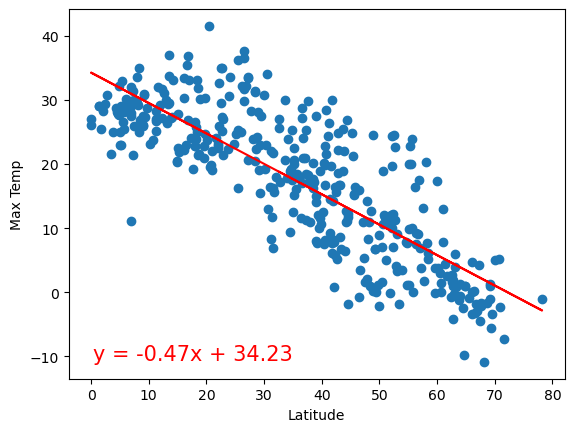

In [60]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
create_linear_regression_plot(x_values, y_values, 'Latitude', 'Max Temp')
plt.show()


The r-squared is: 0.5375635260571975
The correlation between both variables is 0.73.


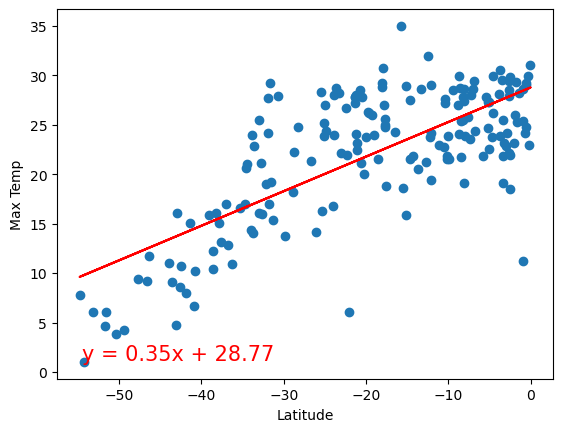

In [49]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
create_linear_regression_plot(x_values, y_values, "Latitude", "Max Temp")
plt.show()

**Max Temperature and Latitude Relationship:** 
The above graphs show the correlation between variables Max Temperature and Latitude is high in both hemispheres. In the northern hemisphere, a high negative correlation indicates that the farther from Latitude 0 or the Equator, the Temperature will decrease. While for the Southern hemisphere, the correlation between both variables is positive, which indicates that the closer to the Equator, the higher the Temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.008398982291709139
The correlation between both variables is 0.09.


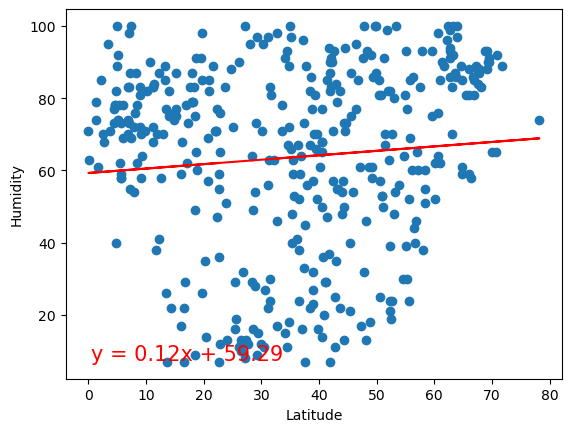

In [50]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
create_linear_regression_plot(x_values, y_values, 'Latitude', 'Humidity')
plt.show()

The r-squared is: 0.02140640110741876
The correlation between both variables is 0.15.


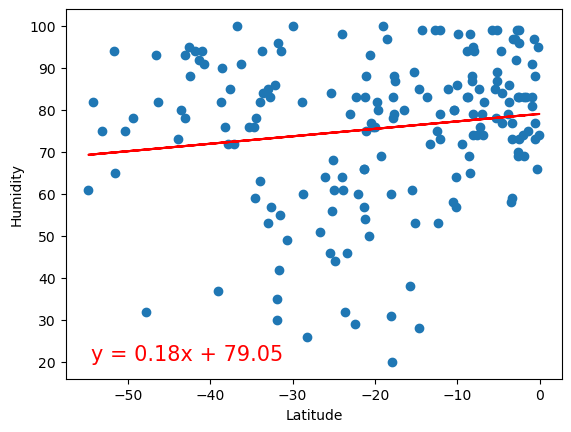

In [51]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
create_linear_regression_plot(x_values, y_values, "Latitude", "Humidity")
plt.show()

**Humidity and Latitude Relationship:** 
The above graphs show the correlation between Humidity and Latitude for both hemispheres. For both hemispheres, the correlation is positive and very weak. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.007621882180093664
The correlation between both variables is 0.09.


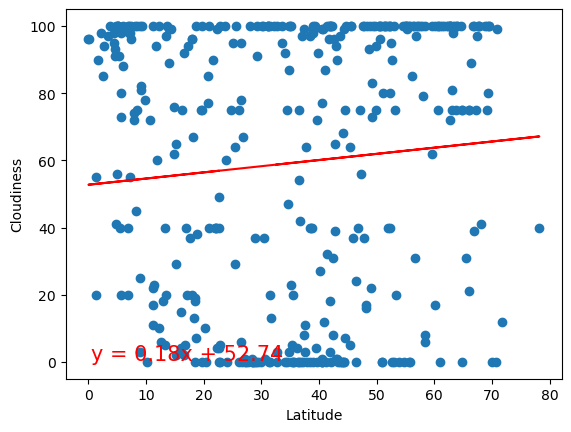

In [52]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
create_linear_regression_plot(x_values, y_values, 'Latitude', 'Cloudiness')
plt.show()

The r-squared is: 0.10576666819658906
The correlation between both variables is 0.33.


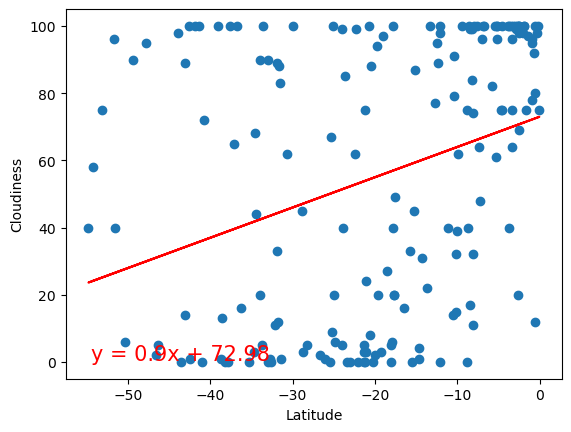

In [53]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
create_linear_regression_plot(x_values, y_values, "Latitude", "Cloudiness")
plt.show()

**Cloudiness and Latitude Relationship:** 
The above graphs show the correlation between variables Cloudiness and Latitude. For both hemispheres, the correlation is positive but weak. Although the correlation in the southern hemisphere is stronger than in the northern hemisphere. For the southern hemisphere, it could be concluded that the closer to the Equator, the higher the cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.002639036503277202
The correlation between both variables is 0.05.


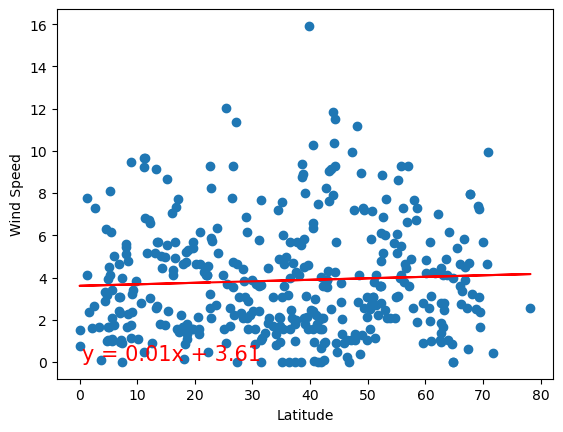

In [54]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
create_linear_regression_plot(x_values, y_values, 'Latitude', 'Wind Speed')
plt.show()

The r-squared is: 0.06933265397500372
The correlation between both variables is -0.26.


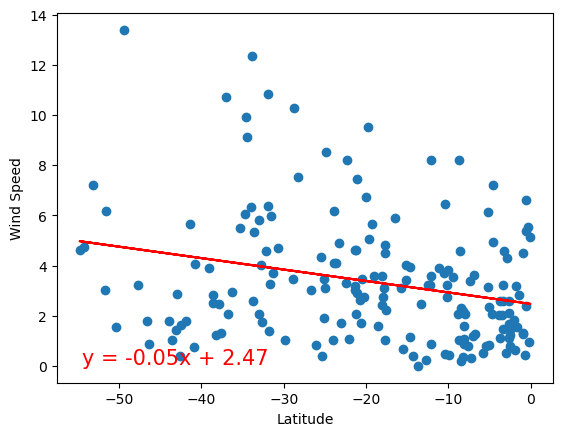

In [55]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
create_linear_regression_plot(x_values, y_values, "Latitude", "Wind Speed")
plt.show()

**Wind Speed and Latitude Relationship:** 
The above graphs show the correlation between variables Wind Speed and Latitude. For the northern hemisphere, there is a positive very weak correlation. While for the southern hemisphere, the correlation is negative and less weak. For the southern hemisphere, this would indicate that the closer to the Equator, the Wind Speed will decrease.